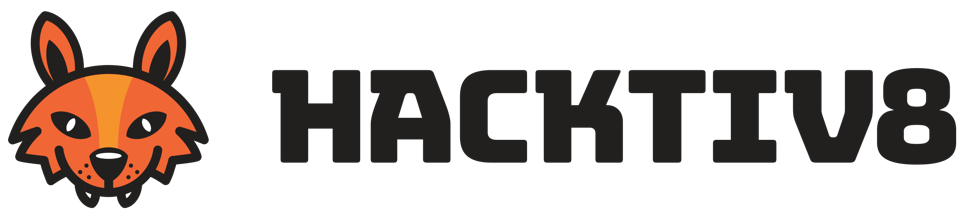

---
# Assignment 3

#### Fadhilah Gustriandini 
---

---
## About Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Variables:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. y : has the client subscribed a term deposit? (binary: 'yes','no')


---

---
## Data Loading
## Import Library

Hal pertama yang akan dilakukan adalah import library yang akan dibutuhkan dalam proses preprocessing dan membangun model sebagai berikut:

In [1]:
# Library For DataFrame
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import missingno as msno

# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing

# For ignore warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

# Style Text
bold = '\033[1m'
normal = '\033[0m'

---

---
## Loading and Reading Dataset

### Import Dataset

Dilakukan load dataset menggunakan pandas

In [2]:
data = pd.read_csv(r"~/datasets/bank_data.csv")

Akan dilihat 5 baris teratas dari dataset menggunakan fungsi head()

In [3]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

Akan dilihat juga 5 baris terbawah dari dataset menggunakan fungsi tail()

In [4]:
data.tail()

age            job  marital  education default  balance housing loan  \
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no

### Type of Data

Gunakan metode info() untuk mendapatkan informasi dasar tentang kerangka data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### List of Columns

untuk mendapatkan list header kolom dapat menggunakan parameter .columns dataframe

In [6]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

### Index

untuk mendapatkan daftar indeks akan digunakan parameter .index

In [7]:
data.index.values

array([   0,    1,    2, ..., 4518, 4519, 4520], dtype=int64)

### Number of Rows and Columns

Menggunakan parameter .shape untuk melihat dimensi dataframe

In [8]:
data.shape

(4521, 17)

Dataset ini memiliki baris berjumlah 4521 dan kolom yang berjumlah 17

In [9]:
# Menghitung jumlah nilai unik pada setiap kolom
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

### Missing Values

In [10]:
# Memeriksa apakah terdapat missing value pada dataset
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat missing values pada dataset

### Duplicated Data

In [11]:
data.duplicated().sum()

0

Tidak terdapat data yang memiliki duplikat

---

## Data Exploration

In [12]:
# Membuat dataframe baru : data_copy
data_copy = data.copy()

# Menunjukkan 5 data teratas
data_copy.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [13]:
# Melihat statistika deskriptif dari data menggunakan fungsi describe()
data_copy.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

### Data Exploration Each Feature

In [14]:
# Melihat nilai unik dari masing-masing kolom
for col in data.columns:
    print(col, ': ')
    print(data[col].unique())
    print('\n','#'*60,'\n')

age : 
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]

 ############################################################ 

job : 
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

 ############################################################ 

marital : 
['married' 'single' 'divorced']

 ############################################################ 

education : 
['primary' 'secondary' 'tertiary' 'unknown']

 ############################################################ 

default : 
['no' 'yes']

 ############################################################ 

balance : 
[ 1787  4789  1350 ...  -333 -3313  1137]

 ############################################################ 

housing : 
['no' 'yes']

 #####################################

### Age

In [15]:
# membuat dataframe yang berisi data pengguna kredit yang berlangganan dan tidak berlangganan berdasarkan usia
yes=pd.DataFrame(data_copy[data_copy['y']=='yes'].groupby(['age'])['age'].count())
yes.rename(columns={'age':'yes'}, inplace=True)
no=pd.DataFrame(data_copy[data_copy['y']=='no'].groupby(['age'])['age'].count())
no.rename(columns={'age':'no'}, inplace=True)
data_age=pd.concat([yes,no], axis=1).reset_index()
data_age=data_age.sort_values(by=['age']).reset_index(drop=True)
data_age

age  yes    no
0    19  2.0   2.0
1    20  1.0   2.0
2    21  1.0   6.0
3    22  3.0   6.0
4    23  2.0  18.0
..  ...  ...   ...
62   81  NaN   1.0
63   83  2.0   2.0
64   84  1.0   NaN
65   86  NaN   1.0
66   87  1.0   NaN

[67 rows x 3 columns]

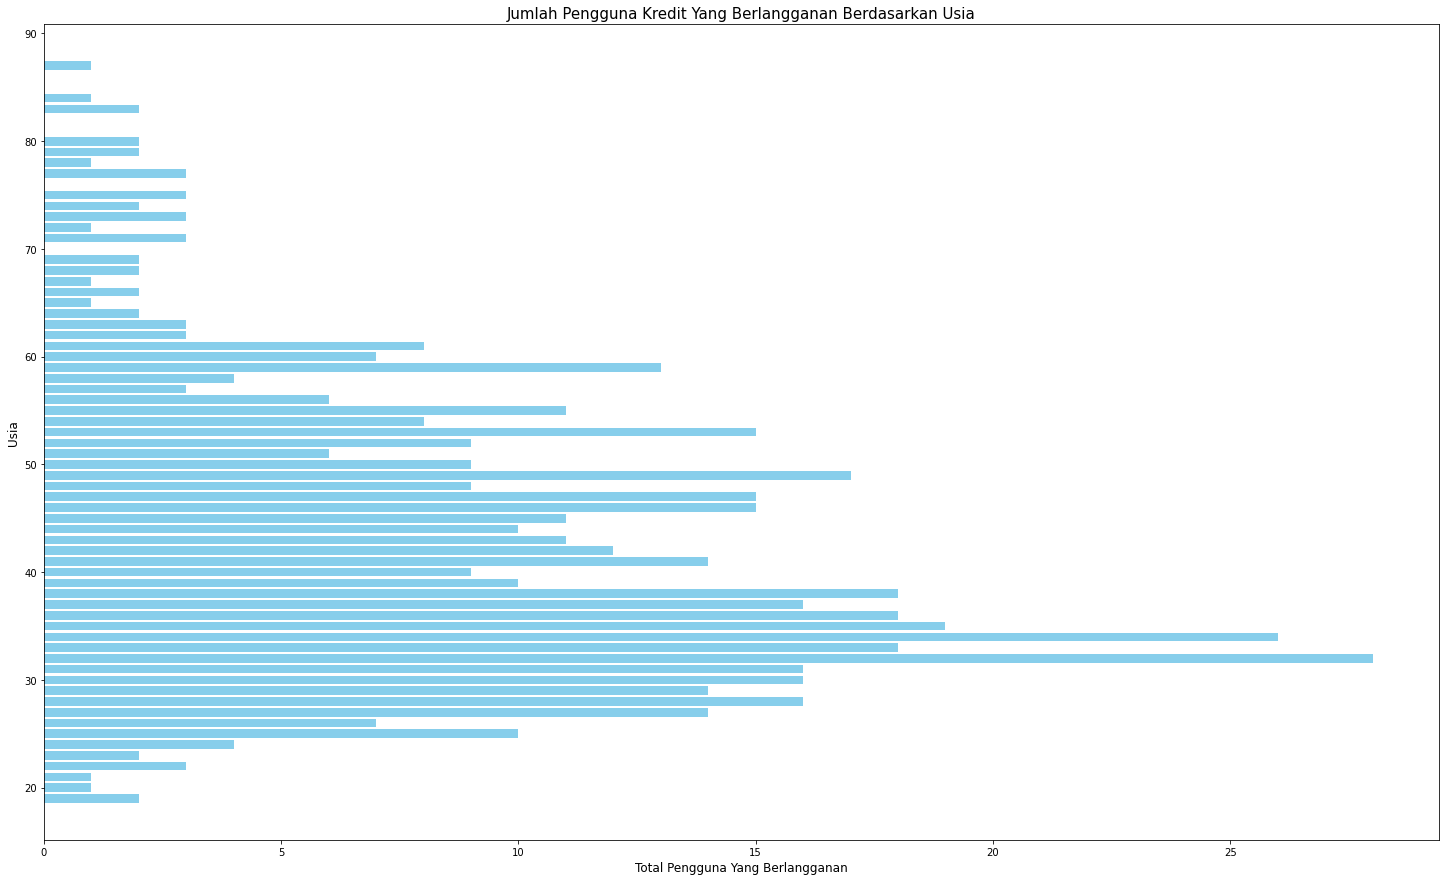

In [16]:
# variabel yang akan digunakan pada plot
x = data_age['age']
y1 = data_age['yes']
y2 = data_age['no']

# inisiasi plot
plt.figure(figsize=(25,15))
plt.barh(x, y1, color='skyblue')

# judul plot
plt.title("Jumlah Pengguna Kredit Yang Berlangganan Berdasarkan Usia", fontsize=15)
# nama pada xlabel
plt.ylabel("Usia", fontsize=12)
# nama pada ylabel
plt.xlabel("Total Pengguna Yang Berlangganan", fontsize=12)

plt.show()

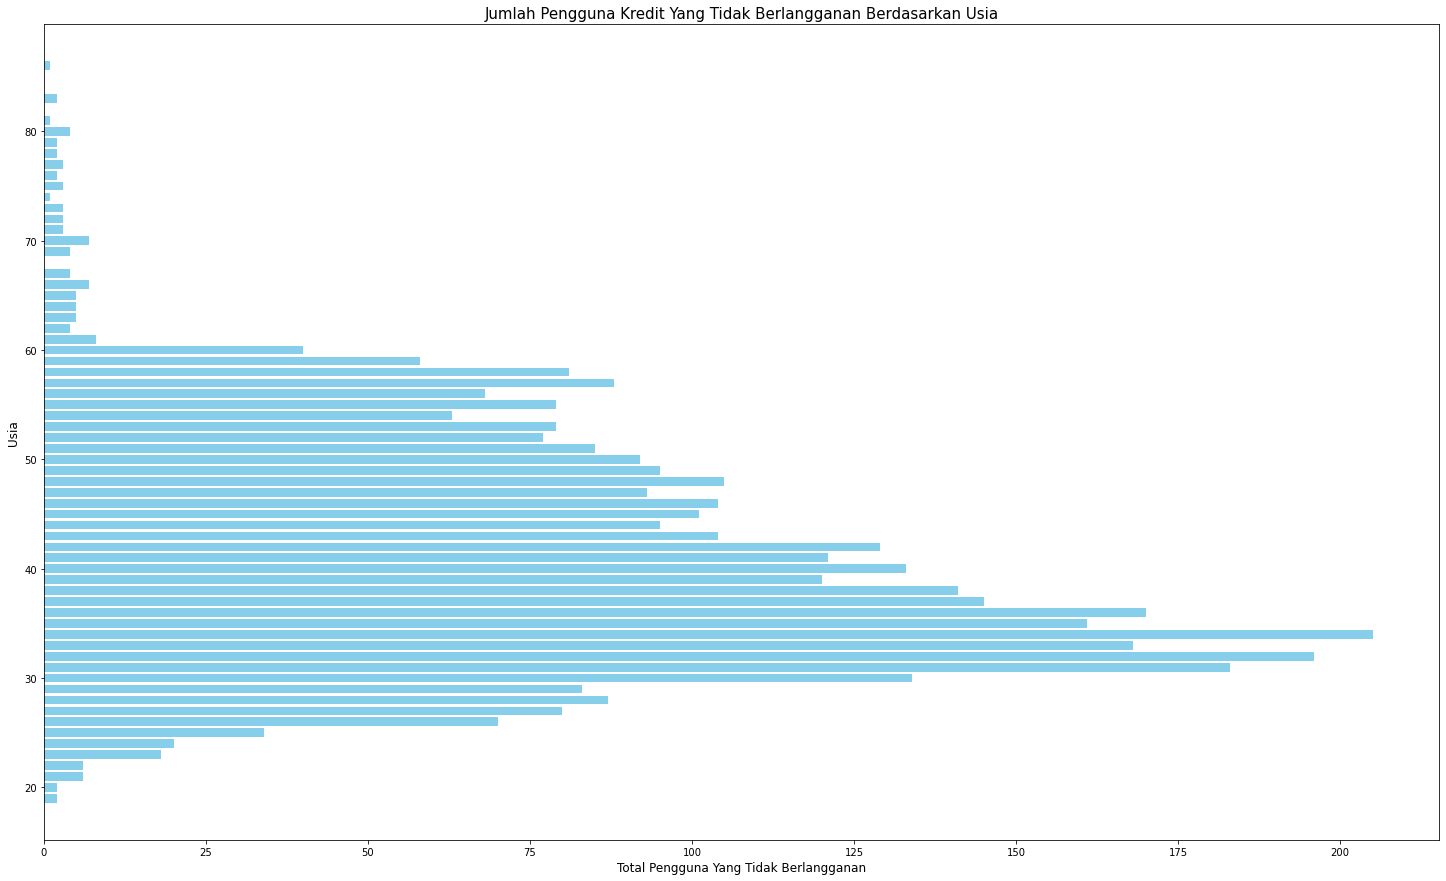

In [17]:
# variabel yang akan digunakan pada plot
x = data_age['age']
y1 = data_age['yes']
y2 = data_age['no']

# inisiasi plot
plt.figure(figsize=(25,15))
plt.barh(x, y2, color='skyblue')

# judul plot
plt.title("Jumlah Pengguna Kredit Yang Tidak Berlangganan Berdasarkan Usia", fontsize=15)
# nama pada xlabel
plt.ylabel("Usia", fontsize=12)
# nama pada ylabel
plt.xlabel("Total Pengguna Yang Tidak Berlangganan", fontsize=12)

plt.show()

<b>Kesimpulan</b>

Berdasarkan plot diatas, dapat disimpulkan bahwa kemungkinan pengguna kredit memilih untuk berlangganan paling banyak terjadi pada pengguna kredit usia 32 tahun. Sedangkan, pengguna kredit yang memilih untuk tidak berlangganan paling banyak terjadi pada pengguna kredit usia 35 tahun. Persebaran berlangganan berdasarkan usia ini memiliki bentuk plot yang cenderung sama.

### Marital

In [18]:
# membuat dataframe yang berisi data pengguna kredit yang berlangganan dan tidak berlangganan berdasarkan usia
yes2=pd.DataFrame(data_copy[data_copy['y']=='yes'].groupby(['marital'])['marital'].count())
yes2.rename(columns={'marital':'yes'}, inplace=True)
no2=pd.DataFrame(data_copy[data_copy['y']=='no'].groupby(['marital'])['marital'].count())
no2.rename(columns={'marital':'no'}, inplace=True)
data_marital=pd.concat([yes2,no2], axis=1)
data_marital=data_marital.sort_values(by=['marital'])
data_marital

yes    no
marital            
divorced   77   451
married   277  2520
single    167  1029

In [19]:
data_yes=pd.concat([yes2], axis=1)
data_yes

yes
marital      
divorced   77
married   277
single    167

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


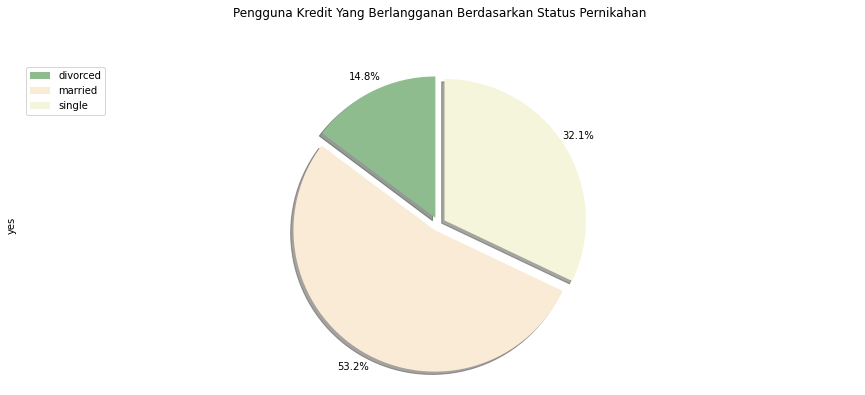

In [20]:
# list warna yang akan digunakan pada pie chart
colors_list = ['darkseagreen','antiquewhite', 'beige']
# jarak antar data pada pie chart
explode_list = [0.05, 0.05, 0.05]

# inisiasi pie chart
data_yes.plot(kind='pie',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
                labels=None,
                subplots=True,
               pctdistance=1.12,
               colors=colors_list,
               explode=explode_list
               )

# judul plot
plt.title('Pengguna Kredit Yang Berlangganan Berdasarkan Status Pernikahan', y=1.12)
plt.axis('equal')
plt.legend(labels=data_yes.index, loc='upper left')

# menunjukkan chart
plt.show()

In [21]:
data_no=pd.concat([no2], axis=1)
data_no

no
marital       
divorced   451
married   2520
single    1029

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


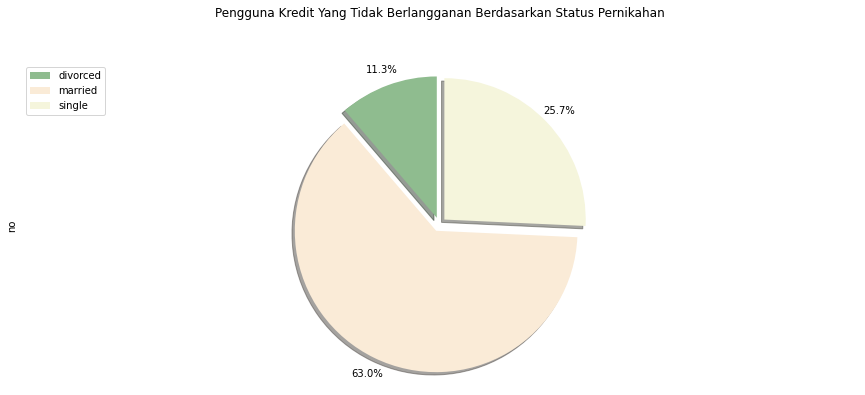

In [22]:
# list warna yang akan digunakan pada pie chart
colors_list = ['darkseagreen','antiquewhite', 'beige']
# jarak antar data pada pie chart
explode_list = [0.05, 0.05, 0.05]

# inisiasi pie chart
data_no.plot(kind='pie',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
                labels=None,
                subplots=True,
               pctdistance=1.12,
               colors=colors_list,
               explode=explode_list
               )

# judul plot
plt.title('Pengguna Kredit Yang Tidak Berlangganan Berdasarkan Status Pernikahan', y=1.12)
plt.axis('equal')
plt.legend(labels=data_no.index, loc='upper left')

# menunjukkan chart
plt.show()

<b>Kesimpulan</b>

Berdasarkan plot diatas, dapat disimpulkan bahwa kemungkinan pengguna kredit memilih untuk berlangganan paling banyak terjadi pada pengguna kredit yang telah menikah dengan persentase 53.2% atau sejumlah 277 pengguna kredit. Namun, pengguna kredit yang memilih untuk tidak berlangganan paling banyak terjadi juga pada pengguna yang telah menikah dengan jumlah pengguna kredit sebanyak 2520 orang dengan persentase sebesar 63.0%. Distribusi berlangganan berdasarkan status pernikahan ini memiliki urutan yang sama. Dimana urutan pertama adalah pengguna kredit yang telah menikah, kedua adalah belum menikah, dan yang terakhir adalah yang sudah bercerai.

### Housing & Loan

In [23]:
# Melihat jumlah penderita anemia
yhousing=len(data_copy[data_copy['housing']=='yes'])
nhousing=len(data_copy[data_copy['housing']=='no'])

# Melihat jumlah penderita diabetes
yloan=len(data_copy[data_copy['loan']=='yes'])
nloan=len(data_copy[data_copy['loan']=='no'])

# Membuat dataframe dari jumlah penderita diabetes, anemia, dan hipertensi
data_HL=pd.DataFrame(
    {'keterangan':['housing','loan'],
     'no':[nhousing,nloan],
    'yes':[yhousing,yloan],
    })
data_HL=data_HL.set_index('keterangan')
data_HL

no   yes
keterangan            
housing     1962  2559
loan        3830   691

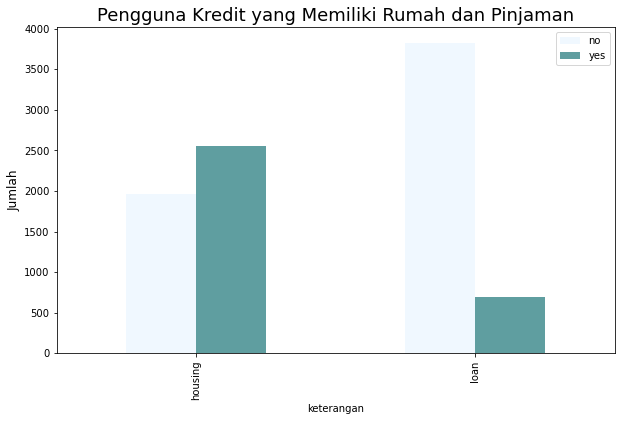

In [24]:
# Membuat visualisasi jumlah penderita anemia, diabetes, hipertensi
data_HL.plot(kind='bar', figsize=(10,6),
                  color=['aliceblue','cadetblue'])
plt.title('Pengguna Kredit yang Memiliki Rumah dan Pinjaman', fontsize=18)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

<b>Kesimpulan:</b>

Dilihat dari plot diketahui bahwa sebagian besar pengguna kredit dalam data memiliki rumah namun tidak memiliki pinjaman

---
## Classification

In [25]:
le = preprocessing.LabelEncoder()
data_copy['job']=le.fit_transform(data_copy['job'])
data_copy['education']=le.fit_transform(data_copy['education'])
data_copy['marital']=le.fit_transform(data_copy['marital'])
data_copy['default']=le.fit_transform(data_copy['default'])
data_copy['housing']=le.fit_transform(data_copy['housing'])
data_copy['loan']=le.fit_transform(data_copy['loan'])
data_copy['contact']=le.fit_transform(data_copy['contact'])
data_copy['month']=le.fit_transform(data_copy['month'])
data_copy['poutcome']=le.fit_transform(data_copy['poutcome'])
data_copy['y']=le.fit_transform(data_copy['y'])

In [26]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int32
 3   education  4521 non-null   int32
 4   default    4521 non-null   int32
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int32
 7   loan       4521 non-null   int32
 8   contact    4521 non-null   int32
 9   day        4521 non-null   int64
 10  month      4521 non-null   int32
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int32
 16  y          4521 non-null   int32
dtypes: int32(10), int64(7)
memory usage: 424.0 KB


In [27]:
# Split dataset in features and target variable
feature_cols = ['age', 'balance', 'day', 'duration', 'pdays', 'previous','campaign',
                   'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

X = data_copy[feature_cols] # Features
y = data_copy.y # Target variable

In [28]:
# Split datset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [29]:
# Melihat jumlah data training dan data testing
print(X_train.shape)
print(X_test.shape)

(3164, 16)
(1357, 16)


In [30]:
# melihat jumlah baris dan kolom dari data
data_copy.shape

(4521, 17)

In [31]:
# melakukan standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Logistic Regression

In [32]:
# membuat variabel model_lr sebagai instance dari LogisticRegression
model_lr=LogisticRegression(solver='liblinear', random_state=0)

In [33]:
model_lr.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [34]:
# Memeriksa output model 
model_lr.classes_

array([0, 1])

In [35]:
# Memeriksa intercept model dan koefisien model
print(model_lr.intercept_, model_lr.coef_)

[-2.69237023] [[ 0.12892504  0.06586455 -0.08149801  1.01818327  0.2929341   0.22067762
  -0.1986211   0.08034565  0.01732113  0.13247805  0.00215221 -0.33920919
  -0.28347943 -0.52987489  0.05260157  0.21037649]]


In [36]:
# Memeriksa performa model dengan melihat probabilitas
model_lr.predict_proba(X_train)

array([[0.97600293, 0.02399707],
       [0.9825793 , 0.0174207 ],
       [0.64897035, 0.35102965],
       ...,
       [0.91733851, 0.08266149],
       [0.99499496, 0.00500504],
       [0.91981212, 0.08018788]])

In [37]:
# Testing model
y_pred_lr=model_lr.predict(X_test)

In [38]:
# Melihat nilai akurasi
print('Train Score:',model_lr.score(X_train, y_train))
print('Test Score:',model_lr.score(X_test, y_test))

Train Score: 0.8966498103666245
Test Score: 0.8717759764185704


Diperoleh nilai akurasi untuk pelatihan data, yaitu 0.896. Sedangkan nilai akurasi untuk pengujian data sebesar 0.871

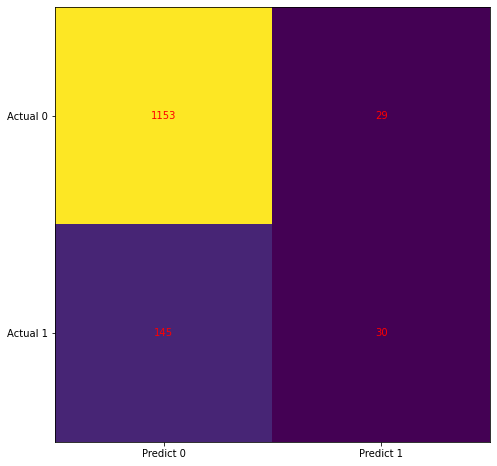

In [39]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_lr)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')

# menampilkan plot
plt.show()

In [40]:
# menampilkan classifier report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1182
           1       0.51      0.17      0.26       175

    accuracy                           0.87      1357
   macro avg       0.70      0.57      0.59      1357
weighted avg       0.84      0.87      0.84      1357



<b>Kesimpulan:</b>\
Berdasarkan confusion matrix di atas, terlihat banyaknya nilai TP (True Positive) adalah 30, FP (False Positive) adalah 29, FN (False Negative) adalah 145, dan TN (True Negative) adalah 1153.

### K-Nearest Neighbor (KNN)

In [41]:
# Create kNN Classifier
knn = KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_knn = knn.predict(X_test)

# Melihat nilai akurasi
print('Train Score:',knn.score(X_train, y_train))
print('Test Score:',knn.score(X_test, y_test))

Train Score: 0.8966498103666245
Test Score: 0.8747236551215918


Diperoleh nilai akurasi untuk pelatihan data, yaitu 0.896. Sedangkan nilai akurasi untuk pengujian data sebesar 0.874

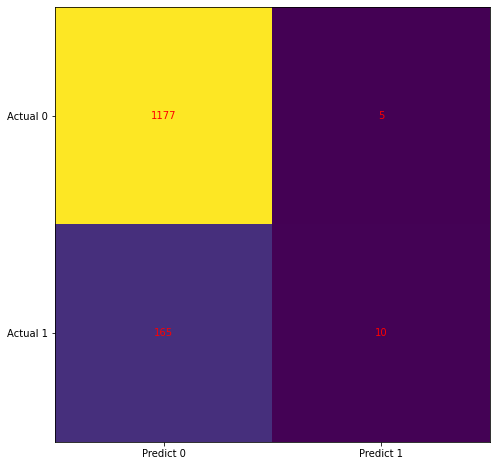

In [42]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_knn)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')

# menampilkan plot
plt.show()

In [43]:
# menampilkan classifier report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1182
           1       0.67      0.06      0.11       175

    accuracy                           0.87      1357
   macro avg       0.77      0.53      0.52      1357
weighted avg       0.85      0.87      0.83      1357



<b>Kesimpulan:</b>\
Berdasarkan confusion matrix di atas, terlihat banyaknya nilai TP (True Positive) adalah 10, FP (False Positive) adalah 5, FN (False Negative) adalah 165, dan TN (True Negative) adalah 1177.

### Support Vector Machine

In [44]:
# membuat variabel model_svm sebagai instance dari SVM
model_svm = svm.SVC(kernel='linear')

In [45]:
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
# Memeriksa intercept model dan koefisien model
print(model_svm.intercept_, model_svm.coef_)

[-1.0001265] [[ 3.99761923e-05 -1.99048865e-05 -9.47106555e-06  1.45448342e-04
   7.09282017e-05  1.57007159e-05  6.66500149e-06  2.09649386e-05
   6.81498183e-06  9.79902858e-06  1.32564655e-05 -5.55148851e-06
  -5.68218564e-05 -1.09566924e-04 -2.03099574e-05  2.88070465e-05]]


In [47]:
# Testing model
y_pred_svm = model_svm.predict(X_test)

In [48]:
# Melihat nilai akurasi
print('Train Score:',model_svm.score(X_train, y_train))
print('Test Score:',model_svm.score(X_test, y_test))

Train Score: 0.8906447534766119
Test Score: 0.871039056742815


Diperoleh nilai akurasi untuk pelatihan data, yaitu 0.890. Sedangkan nilai akurasi untuk pengujian data sebesar 0.871

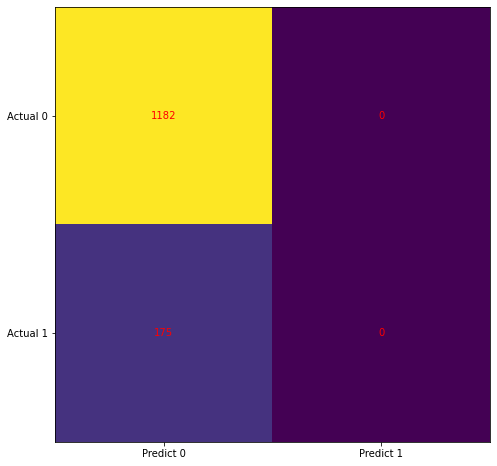

In [49]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_svm)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')

# menampilkan plot        
plt.show()

In [50]:
# menampilkan clssifier report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1182
           1       0.00      0.00      0.00       175

    accuracy                           0.87      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.76      0.87      0.81      1357



<b>Kesimpulan:</b>\
Berdasarkan confusion matrix di atas, terlihat banyaknya nilai TP (True Positive) adalah 0, FP (False Positive) adalah 0, FN (False Negative) adalah 175, dan TN (True Negative) adalah 1182.

### Decision Tree

In [51]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

In [52]:
# Model Accuracy, how often is the classifier correct?
# Melihat nilai akurasi
print('Train Score:',clf.score(X_train, y_train))
print('Test Score:',clf.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.8533529845246868


Diperoleh nilai akurasi untuk pelatihan data, yaitu 1.0. Sedangkan nilai akurasi untuk pengujian data sebesar 0.854

In [53]:
#Classification Report Decition Tree Classifier
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1182
           1       0.43      0.41      0.42       175

    accuracy                           0.85      1357
   macro avg       0.67      0.67      0.67      1357
weighted avg       0.85      0.85      0.85      1357



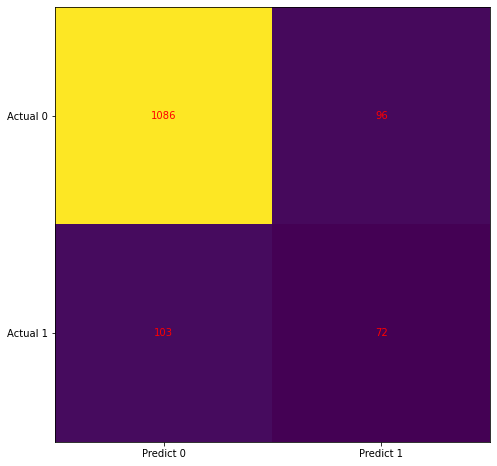

In [54]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_dt)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')

# menampilkan plot        
plt.show()

<b>Kesimpulan:</b>\
Berdasarkan confusion matrix di atas, terlihat banyaknya nilai TP (True Positive) adalah 64, FP (False Positive) adalah 86, FN (False Negative) adalah 111, dan TN (True Negative) adalah 1096.

#### Visualisasi Decision Tree

In [55]:
!conda install python-graphviz -y
print('done')

Solving environment: ...working... done

# All requested packages already installed.

done


In [56]:
!pip install pydotplus
print('done')

In [57]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [58]:
dot_data = StringIO()
tree.export_graphviz(clf,out_file=dot_data,
                    class_names=['0','1'], #the target names.
                    feature_names=feature_cols, #the feature names.
                    filled=True, #whether to fill in the boxes with colours.
                    rounded=True, #whether to round the corners of the boxes.
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest

In [59]:
model_rf = RandomForestClassifier(n_estimators=100)

In [60]:
# Training Model
model_rf.fit(X_train, y_train)

# Testing Model
y_pred_rf = model_rf.predict(X_test)

# Evaluasi model
confusion_matrix(y_test,y_pred_rf)

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1182
           1       0.64      0.26      0.37       175

    accuracy                           0.89      1357
   macro avg       0.77      0.62      0.65      1357
weighted avg       0.87      0.89      0.86      1357



In [61]:
# Model Accuracy, how often is the classifier correct?
print('Train Score:',model_rf.score(X_train, y_train))
print('Test Score:',model_rf.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.8857774502579219


Diperoleh nilai akurasi untuk pelatihan data, yaitu 1.0. Sedangkan nilai akurasi untuk pengujian data sebesar 0.890

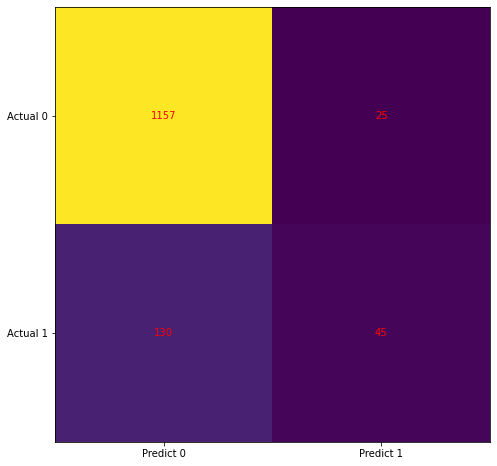

In [62]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_rf)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')

# menampilkan plot        
plt.show()

<b>Kesimpulan:</b>\
Berdasarkan confusion matrix di atas, terlihat banyaknya nilai TP (True Positive) adalah 49, FP (False Positive) adalah 28, FN (False Negative) adalah 126, dan TN (True Negative) adalah 1154.

### Naive Bayes

In [63]:
# Import Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test datasets
y_pred_nb = gnb.predict(X_test)

In [64]:
# Model Accuracy, how often is the classifier correct?
print('Train Score:',gnb.score(X_train, y_train))
print('Test Score:',gnb.score(X_test, y_test))

Train Score: 0.8422882427307206
Test Score: 0.8209285187914517


Diperoleh nilai akurasi untuk pelatihan data, yaitu 0.842. Sedangkan nilai akurasi untuk pengujian data sebesar 0.820

In [65]:
#Classification Report Decition Tree Classifier
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1182
           1       0.33      0.37      0.35       175

    accuracy                           0.82      1357
   macro avg       0.62      0.63      0.62      1357
weighted avg       0.83      0.82      0.83      1357



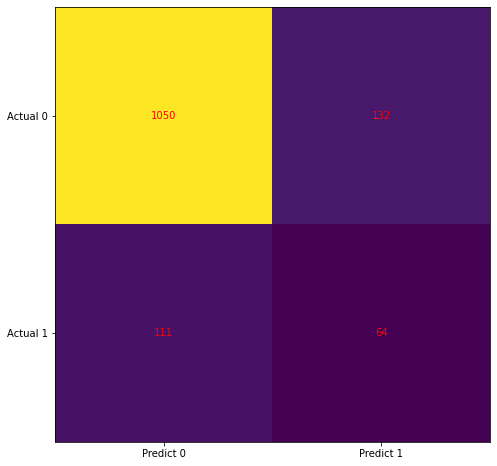

In [66]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test,y_pred_nb)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),
             ticklabels=('Predict 0','Predict 1'))
ax.yaxis.set(ticks=(0,1),
             ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
               color='red')

# menampilkan plot        
plt.show()

<b>Kesimpulan:</b>\
Berdasarkan confusion matrix di atas, terlihat banyaknya nilai TP (True Positive) adalah 64, FP (False Positive) adalah 132, FN (False Negative) adalah 111, dan TN (True Negative) adalah 1050.

---

Dari 6 metode klasifikasi yang telah dilakukan, diperoleh hasil akurasi:
1. Logistic Regression : 0.871%
2. KNN : 0.874%
3. SVM : 0.871%
4. Decision Tree : 0.854%
5. <b>Random Forest : 0.890%</b>
6. Naive Bayes : 0.842%

Oleh karena itu, metode <b>Random Forest</b> merupakan metode yang paling tepat untuk digunakan dalam data Bank Marketing ini, karena metode Random Forest memiliki hasil akurasi yang paling besar. Selain itu, random forest memilih sample data secara acak dan membuat decision tree dari masing-masing sample tersebut kemudian output didapat dari rata-ratanya sehingga akan menghasilkan prediksi yang lebih akurat dan menghindari overfitting.